<a href="https://colab.research.google.com/github/joseph15paul/Playground/blob/master/ML_project_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [132]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling (2).xlsx


#1.1 creating a dataframe from the file

In [133]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name='Data')


In [5]:
#displaying first 5 rows
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#displaying last 5 rows
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#1.2 checking types of data and summary stats

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Experience has negative values, so that coloumn must have faulty data.

#2. Removing redundant coloumns
some coloumns like ID won't provide any relevant information that we can use.

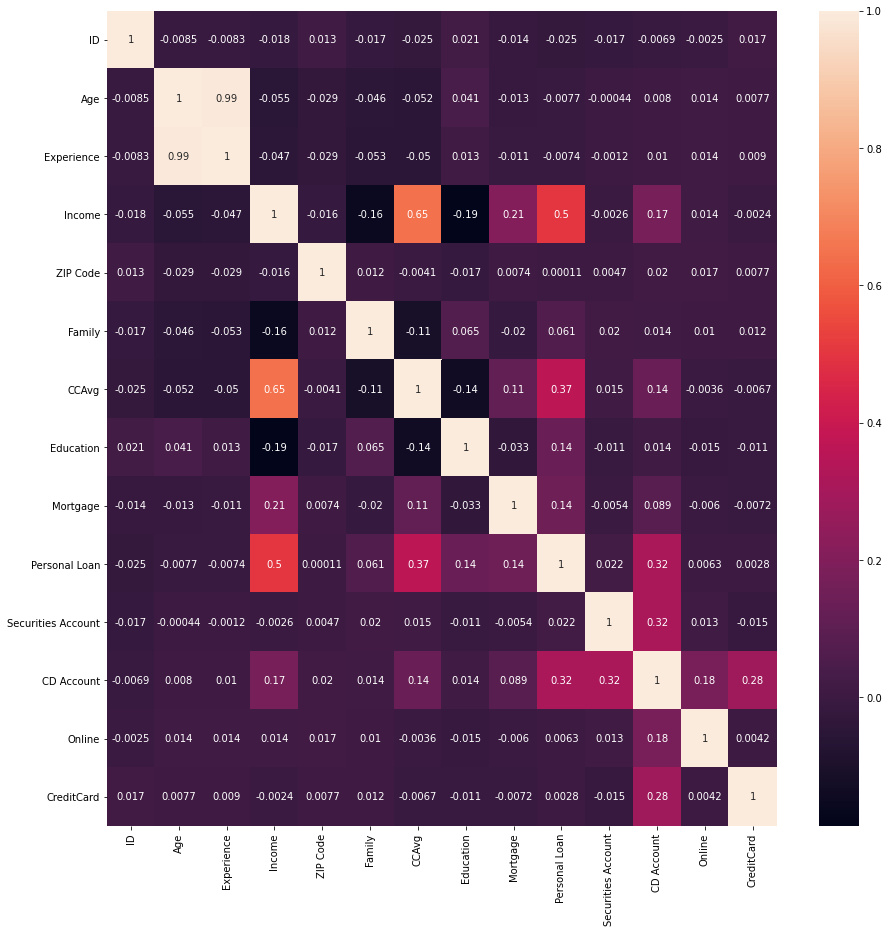

In [ ]:

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df.corr(), annot=True,ax =ax)
plt.show()

Age and Experience has high correlation, so we can treat those both as same and since experience has faulty data we can just drop that coloumn.

In [134]:
df = df.drop(columns=['ID', 'Experience'],axis=1)
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


#3.EDA

In [ ]:
#Number of unique in each column
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

Zip code could have been useful as a categorical column if it had lower number of unique values which would have meant fewer locations of interest. But since it has 467 unique values we can drop that column.

In [135]:
df=df.drop("ZIP Code",axis = 1)

In [ ]:
#Number of people with zero mortgage
#since out of 5000 accounts 3462 has mortgage, the data is skewed
(df['Mortgage'] == 0).sum()

3462

In [ ]:
#Number of people with zero credit card spending per month
(df['CCAvg'] == 0).sum()

106

In [ ]:
#Value counts of all categorical columns (coloumns with low number of unique values)
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

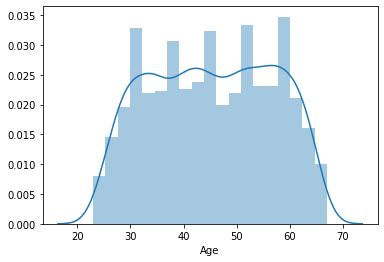

In [ ]:
#Univariate analysis
sns.distplot(df['Age'])

#age seems to have a normal symmetric distribution and has little outliers

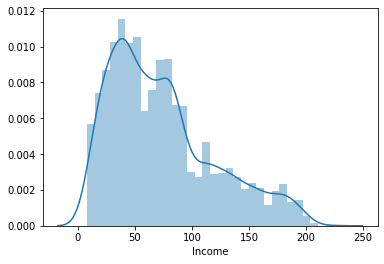

In [ ]:
sns.distplot(df['Income'])
#Income coloumn has skewed data

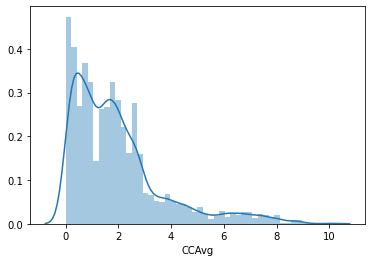

In [ ]:
sns.distplot(df['CCAvg'])
#skewed

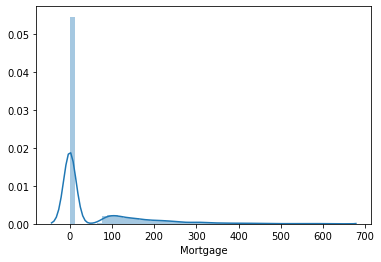

In [ ]:
sns.distplot(df['Mortgage'])
#highly skewed

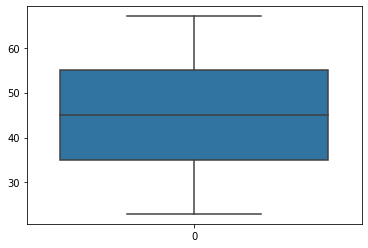

In [ ]:
sns.boxplot(data = df['Age'])
#interquartile range of age is from 35 to 55.

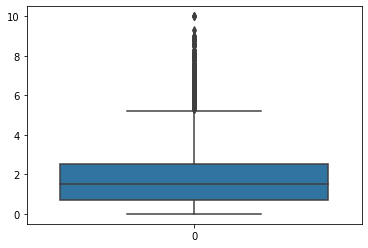

In [ ]:
sns.boxplot(data = df['CCAvg'])
#many outliers above 5

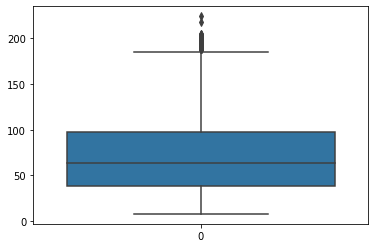

In [ ]:
sns.boxplot(data = df['Income'])
# has many high valued outliers


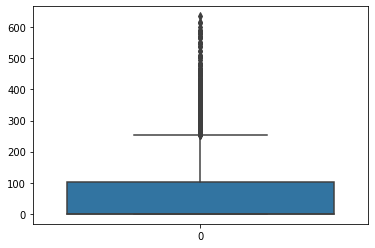

In [ ]:
sns.boxplot(data = df['Mortgage'])
#Mortgage has many values as 0


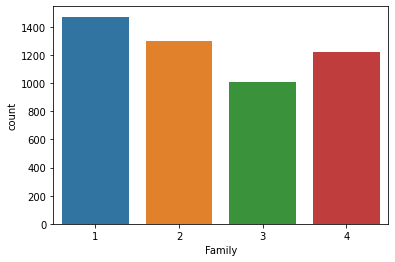

In [ ]:
sns.countplot(df.Family)
#data accounts for only families with 4 members or less


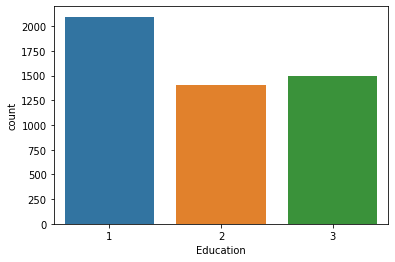

In [ ]:
sns.countplot(df.Education)

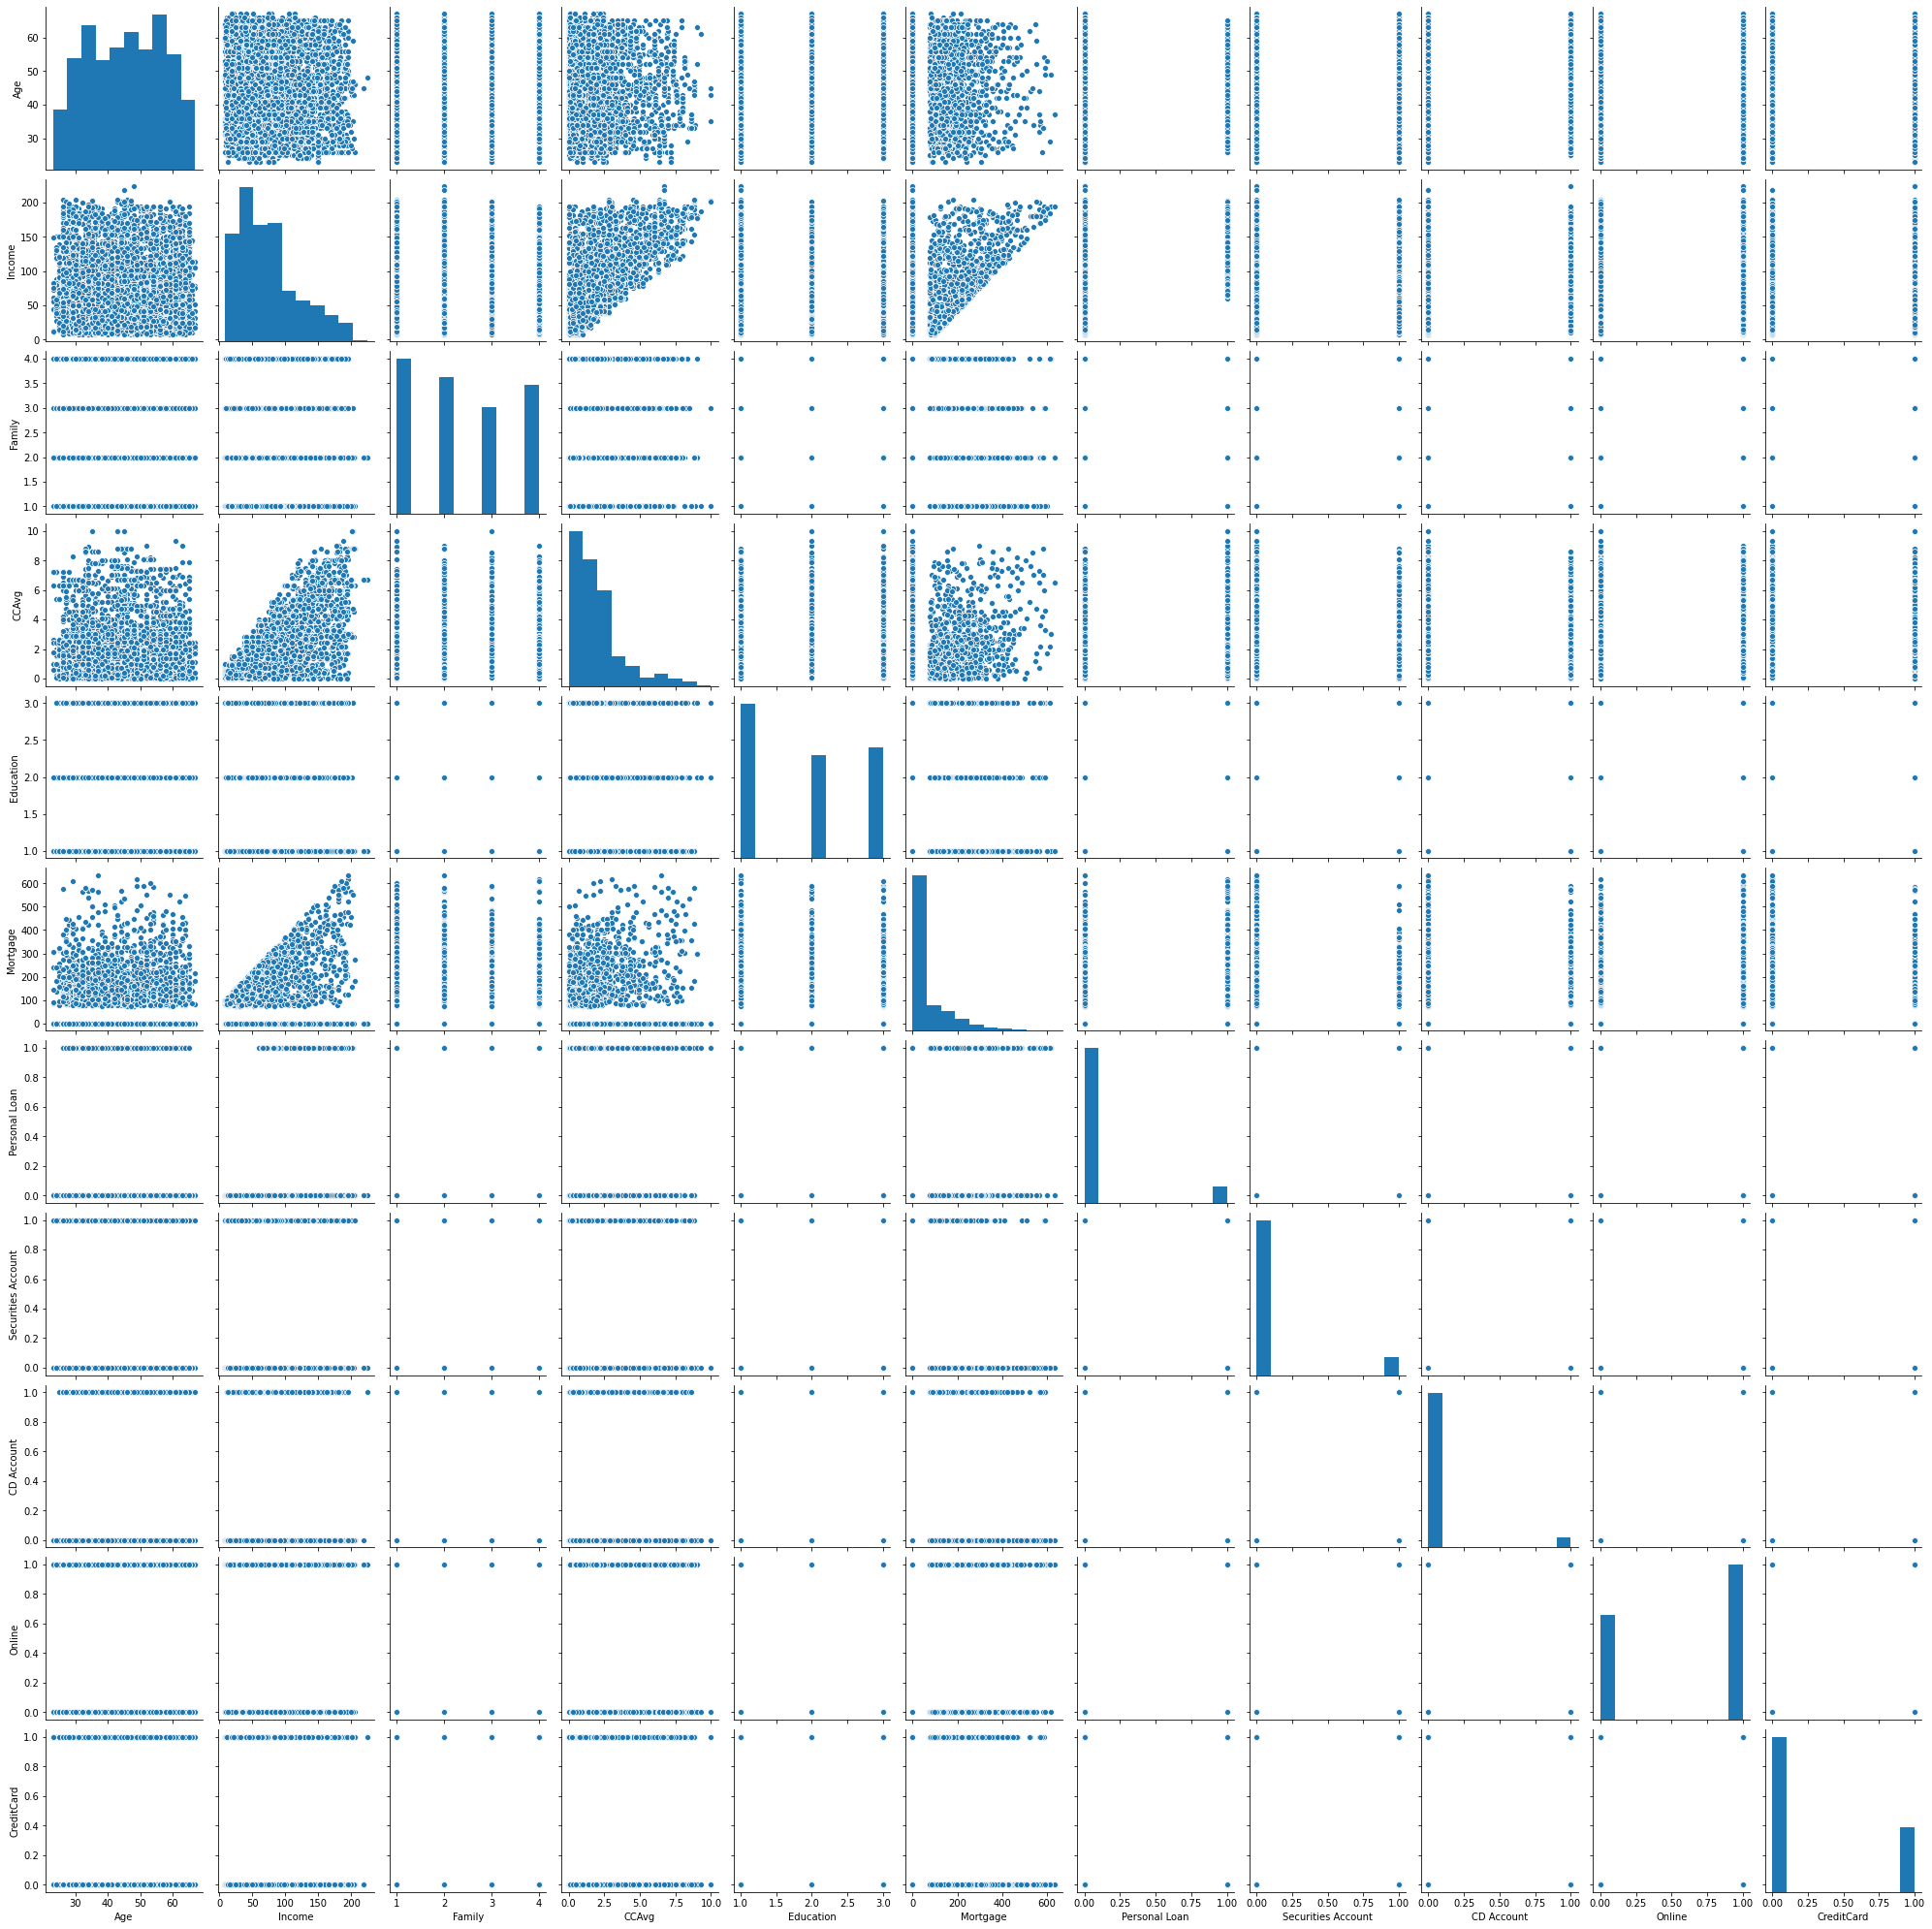

In [ ]:
#Bivariate analysis
sns.pairplot(df)

#CCAvg and Mortgage increase with income

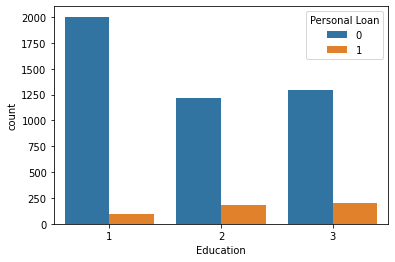

In [ ]:
sns.countplot(x = 'Education',data = df,hue=df['Personal Loan'])
#most people with lower education don't have personal loan

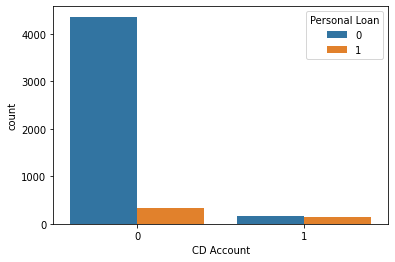

In [ ]:
sns.countplot(x = 'CD Account',data = df,hue=df['Personal Loan'])
# about 45% of people with CD account has a personal loan

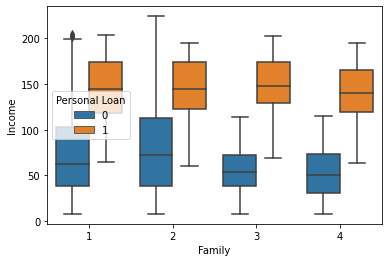

In [ ]:
sns.boxplot(x= 'Family',y = 'Income', data = df, hue = 'Personal Loan')
#people with more income take more personal loans

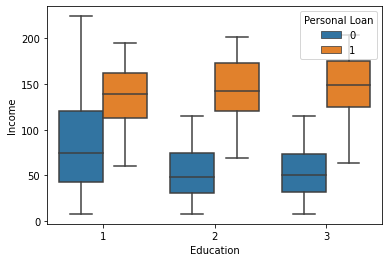

In [ ]:
sns.boxplot(x= 'Education',y = 'Income', data = df, hue = 'Personal Loan')

#4. Applying necessary transformations for the feature variables

In [136]:
#seperating personal loan coloumn from rest
features = df.iloc[:,df.columns != "Personal Loan"]
ploan = df['Personal Loan']
print(features)
print(ploan)

      Age  Income  Family  ...  CD Account  Online  CreditCard
0      25      49       4  ...           0       0           0
1      45      34       3  ...           0       0           0
2      39      11       1  ...           0       0           0
3      35     100       1  ...           0       0           0
4      35      45       4  ...           0       0           1
...   ...     ...     ...  ...         ...     ...         ...
4995   29      40       1  ...           0       1           0
4996   30      15       4  ...           0       1           0
4997   63      24       2  ...           0       0           0
4998   65      49       3  ...           0       1           0
4999   28      83       3  ...           0       1           1

[5000 rows x 10 columns]
0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64


In [10]:
num = features.dtypes[df.dtypes!=object].index
skew= features[num].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skew})
skewness



,Skew
CD Account,3.691714
Securities Account,2.588268
Mortgage,2.104002
CCAvg,1.598457
CreditCard,0.904589
Income,0.841339
Education,0.227093
Family,0.155221
Age,-0.029341
Online,-0.394785


using Square Root Transformation

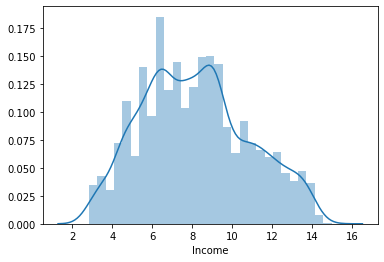

In [36]:
sqrIncome = np.sqrt(features["Income"])
sns.distplot(sqrIncome)
#skewness has decreased somewhat, still unsymmetrical

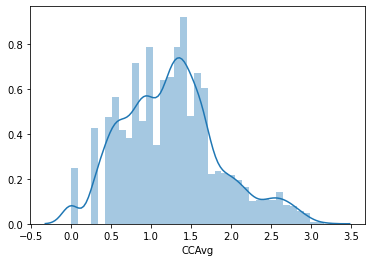

In [38]:
sqrCCAvg = np.sqrt(features["CCAvg"])
sns.distplot(sqrCCAvg)
#unsymmetrical

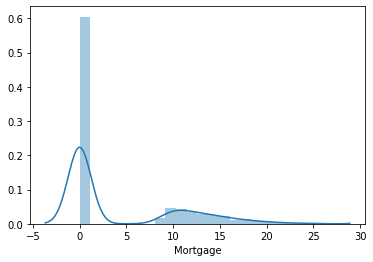

In [37]:
sqrMortgage = np.sqrt(features["Mortgage"])
sns.distplot(sqrMortgage)
#still skewed

using log tranformation

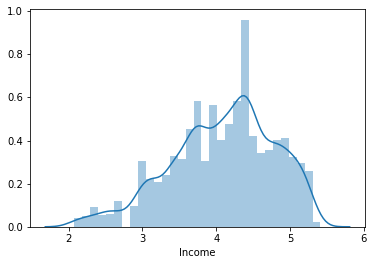

In [28]:
logIncome = np.log(features["Income"])
sns.distplot(logIncome)
#got right skewed


using boxcox

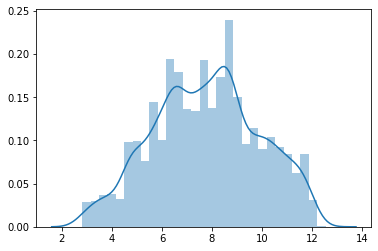

In [25]:
from scipy import stats 
bcIncome,Lambda=stats.boxcox(features['Income'])
sns.distplot(bcIncome)
#almost good

using power transform

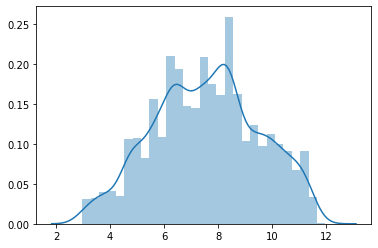

In [137]:
from sklearn.preprocessing import PowerTransformer
transf= PowerTransformer("yeo-johnson",standardize = False)
transf.fit(features["Income"].values.reshape(-1,1))
powIncome = transf.transform(features["Income"].values.reshape(-1,1))
sns.distplot(powIncome)
#skewness reduced

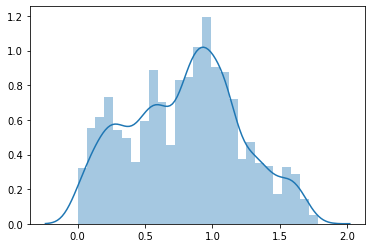

In [138]:
transf= PowerTransformer("yeo-johnson",standardize = False)
transf.fit(features["CCAvg"].values.reshape(-1,1))
powCCAvg = transf.transform(features["CCAvg"].values.reshape(-1,1))
sns.distplot(powCCAvg)

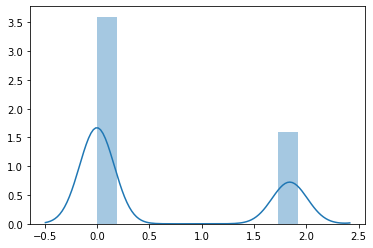

In [39]:
transf= PowerTransformer("yeo-johnson",standardize = False)
transf.fit(features["Mortgage"].values.reshape(-1,1))
powMortgage = transf.transform(features["Mortgage"].values.reshape(-1,1))
sns.distplot(powMortgage)
#highly skewed still

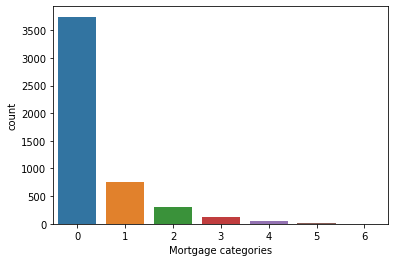

In [139]:
#using binning
bins = [0,100,200,300,400,500,600,700]
group_names = [0,1,2,3,4,5,6]
categories = pd.cut(features['Mortgage'], bins, labels=group_names)
features['Mortgage categories'] = pd.cut(features['Mortgage'], bins, labels=group_names,include_lowest=True)
sns.countplot(features['Mortgage categories'])

power transformation seems to be the best for Income and CCAvg and binning for Mortgage, so replacing original data with transformed data

In [140]:
#removing Mortgage coloumn
features = features.drop(columns="Mortgage",axis =1)


In [141]:
#replacing income and CCavg columns with power transformed versions
features['Income'] = pd.Series(powIncome.reshape(5000,1).flatten())


In [142]:
features['CCAvg'] = pd.Series(powCCAvg.reshape(5000,1).flatten())
features

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage categories
0,25,6.827583,4,0.845150,1,1,0,0,0,0
1,45,5.876952,3,0.814468,1,1,0,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4995,29,6.287699,1,0.928929,3,0,0,1,0,0
4996,30,4.077942,4,0.322048,1,0,0,1,0,0
4997,63,5.058173,2,0.253538,3,0,0,0,0,0
4998,65,6.827583,3,0.384643,2,0,0,1,0,0


#5. splitting data into training and test sets


In [130]:
from sklearn.model_selection import train_test_split
train_feat,test_feat,train_ploan,test_ploan = train_test_split(features,ploan,test_size=0.3,stratify = ploan, random_state=0)


#6. Building the Logistic Regression model

In [143]:
#using std scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_feat = scaler.fit_transform(train_feat)
test_feat = scaler.transform(test_feat)

In [144]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1,max_iter=5000)
model.fit(train_feat, train_ploan)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

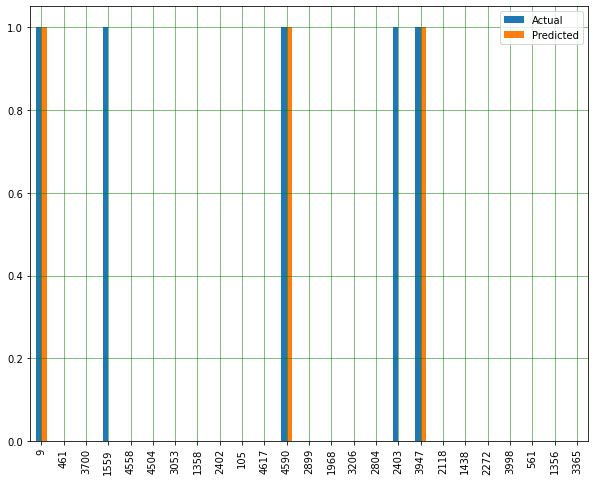

In [145]:
#making prediction
pred_ploan = model.predict(test_feat)

checker = pd.DataFrame({'Actual': test_ploan, 'Predicted': pred_ploan})
data = checker.head(25)
data.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#7. Performance evaluation

In [146]:

# checking error values
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_ploan, pred_ploan))  
print('Mean Squared Error:', metrics.mean_squared_error(test_ploan, pred_ploan))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_ploan, pred_ploan)))

Mean Absolute Error: 0.04533333333333334
Mean Squared Error: 0.04533333333333334
Root Mean Squared Error: 0.21291625896895083


In [147]:
#cross validation
from sklearn.model_selection import cross_val_score

acc = cross_val_score(model, train_feat , train_ploan,cv = 10 )
print('Cross-Validation Accuracy ', acc)

Cross-Validation Accuracy  [0.95714286 0.96       0.93142857 0.95714286 0.95714286 0.95428571
 0.95428571 0.95428571 0.97142857 0.96      ]


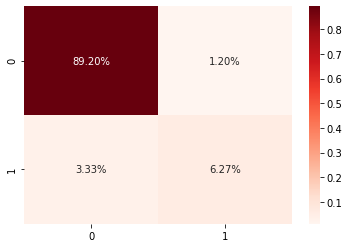

In [148]:
#confusion matrix for test set
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(test_ploan,pred_ploan)
sns.heatmap(conf/np.sum(conf),fmt='.2%', annot=True,cmap="Reds")

#seems to make many false positives


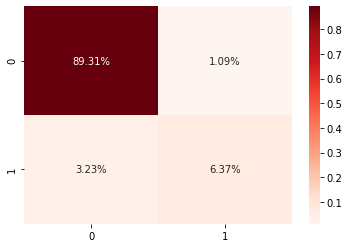

In [149]:
#confusion matrix for test set
predtra_ploan = model.predict(train_feat)

from sklearn.metrics import confusion_matrix
confu = confusion_matrix(train_ploan,predtra_ploan)
sns.heatmap(confu/np.sum(confu),fmt='.2%', annot=True,cmap="Reds")

In [150]:
#accuracy for testing model
metrics.accuracy_score(test_ploan,pred_ploan)

0.9546666666666667

In [151]:
#accuracy for training model
metrics.accuracy_score(train_ploan,predtra_ploan)

0.9568571428571429

In [152]:
#f1 score for testing model
metrics.f1_score(test_ploan,pred_ploan)


0.734375

In [153]:
#f1 score for training model
metrics.f1_score(train_ploan,predtra_ploan)

0.7470686767169179

In [154]:
#ROC score for testing model
metrics.roc_auc_score(test_ploan,pred_ploan)

0.819751720747296

In [155]:
#ROC score for training model
metrics.roc_auc_score(train_ploan,predtra_ploan)

0.8258401812052255

logistic regression is moderately good, but it classifies many people who will take loans as they won't(false negatives), which is undesirable for our case

#8. Building other models

build and compares 4 more models 

1.   Decision tree 
2.   Random Forest
3.   Neural Network
4.   KNN

and chooses the best one out of the 5 models



**Decision tree**

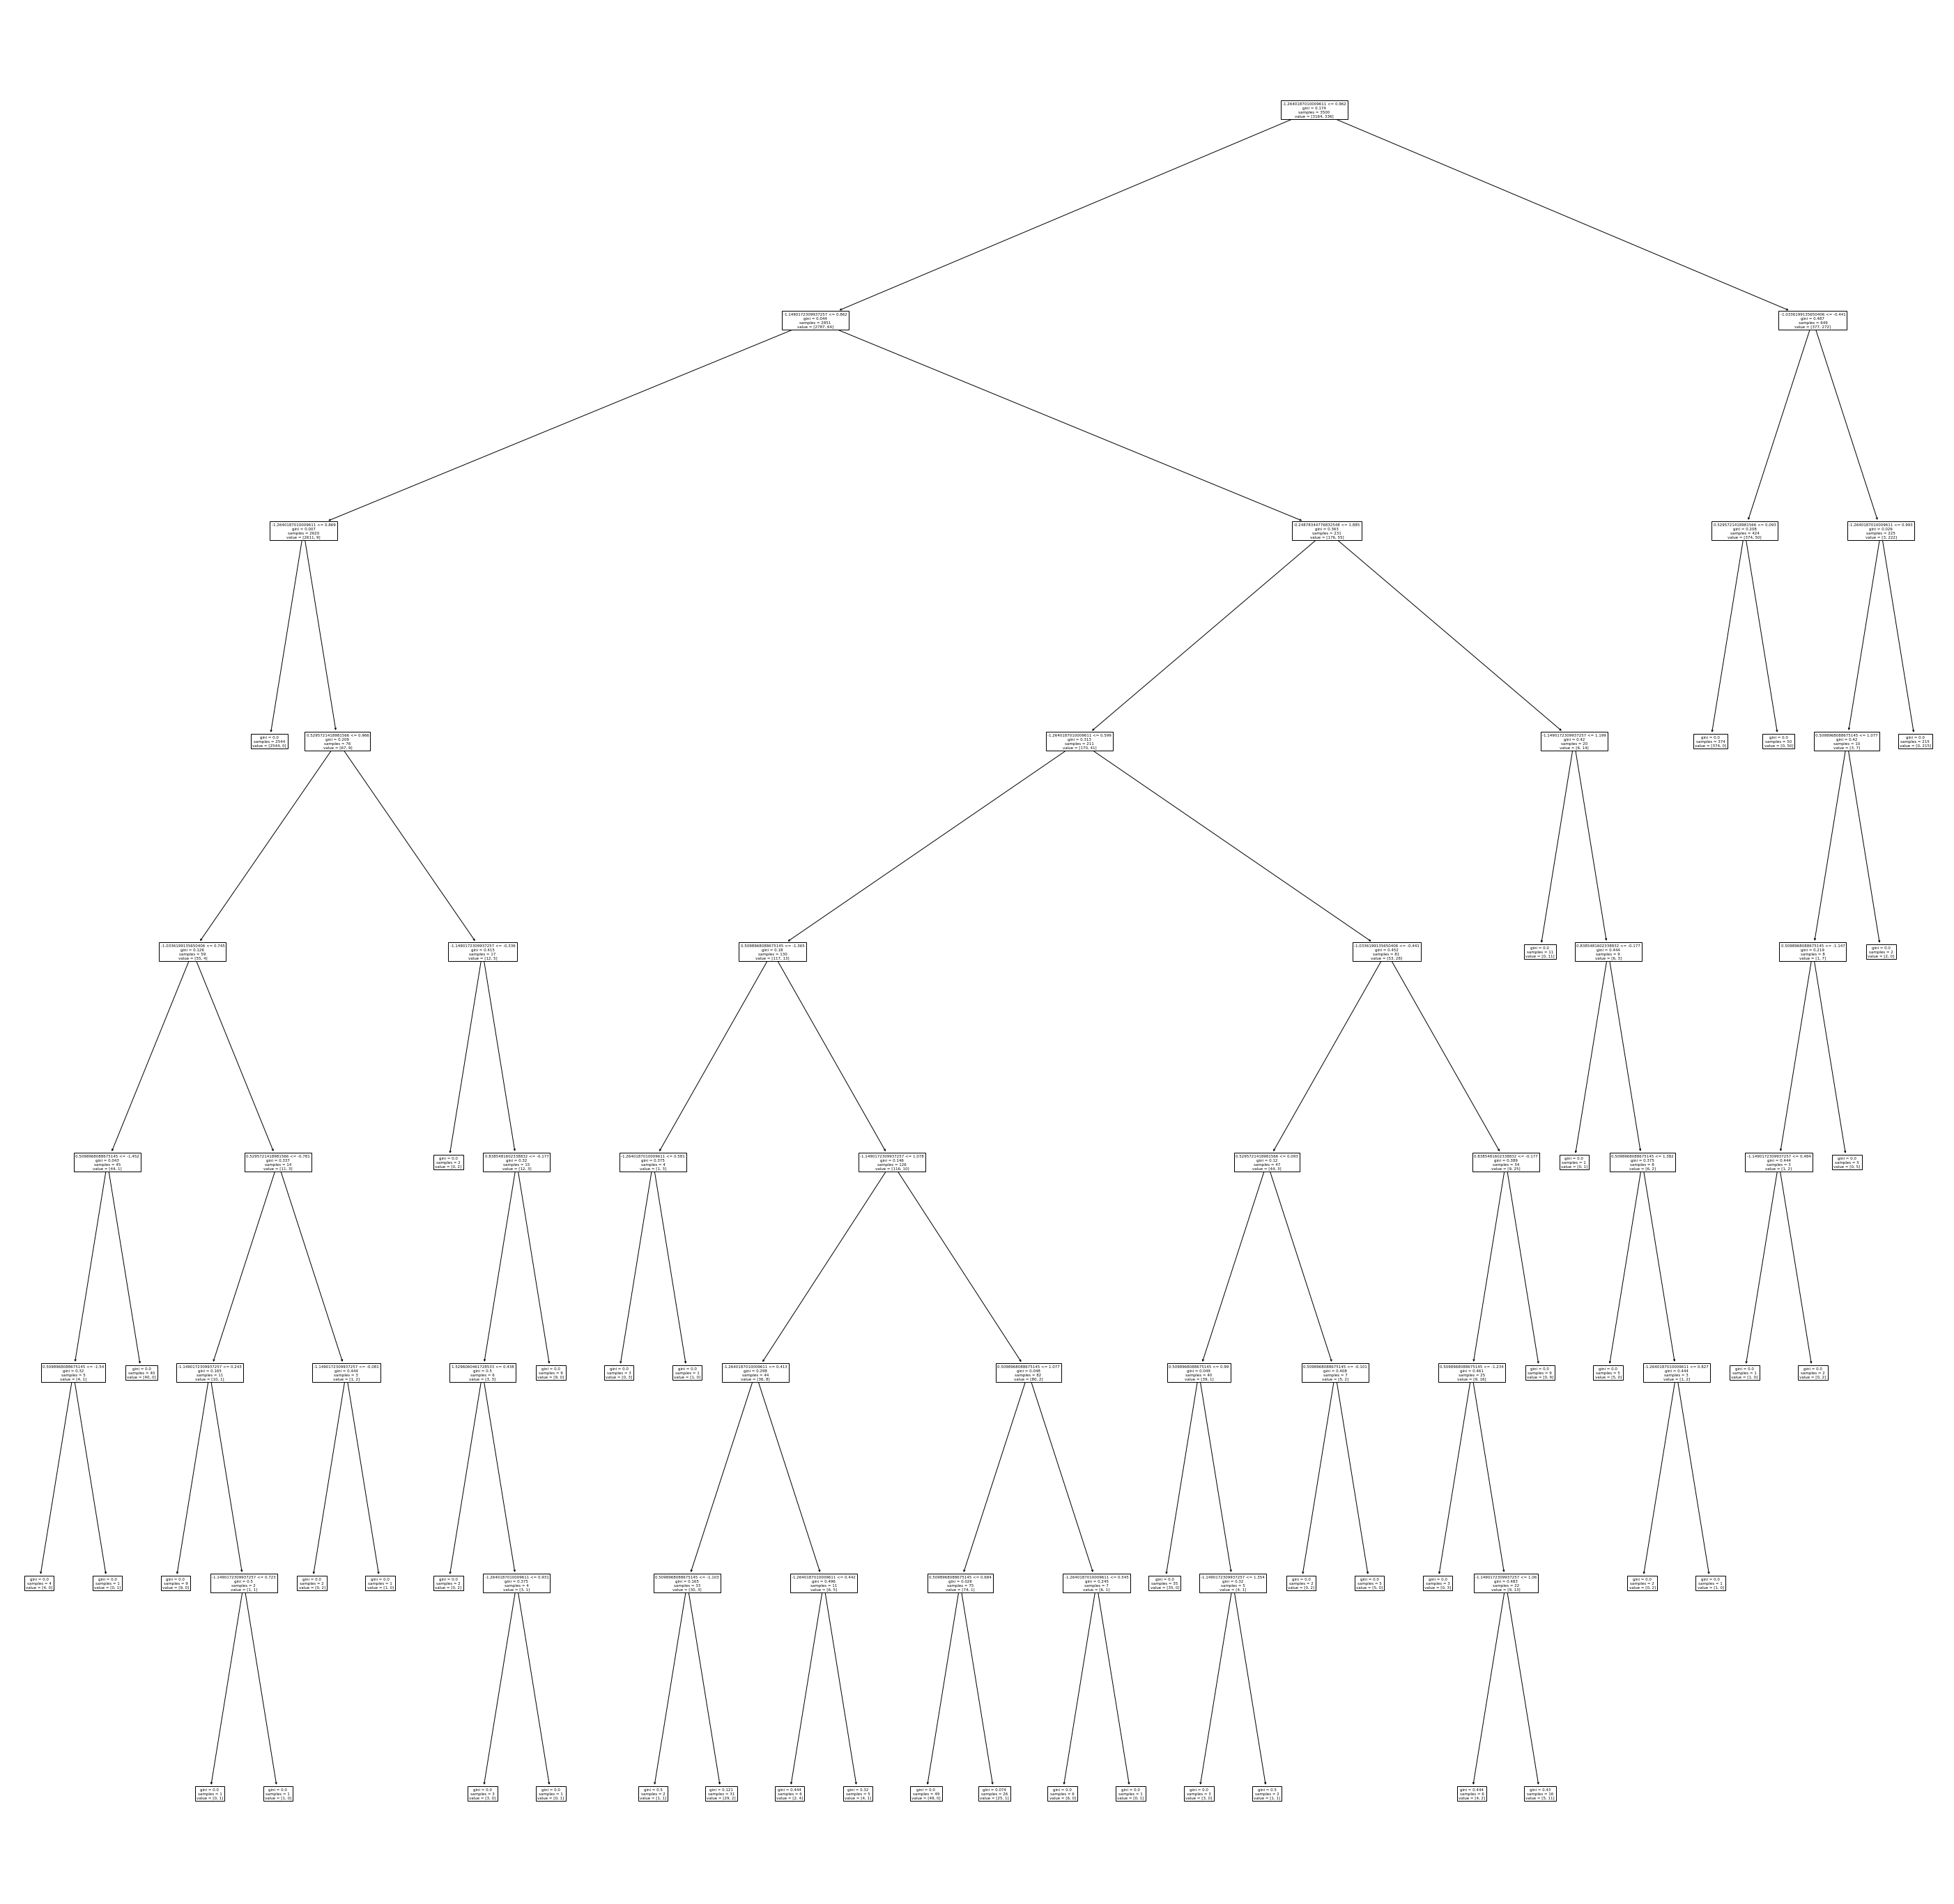

In [213]:
#building model and graphing the decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8,random_state=0)
dt.fit(X=train_feat,y=train_ploan)
fig = plt.figure(figsize=(50,50))
figr = tree.plot_tree(dt, feature_names=train_feat[0,:])

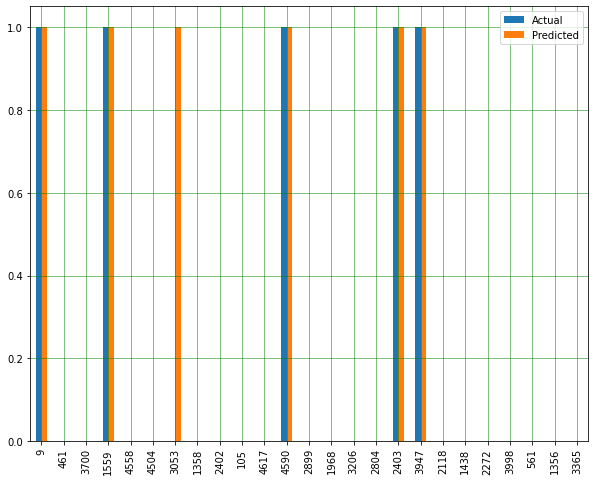

In [214]:
#making prediction
pred_ploan_test = dt.predict(test_feat)
pred_ploan_train = dt.predict(train_feat)

checker = pd.DataFrame({'Actual': test_ploan, 'Predicted': pred_ploan_test})
data = checker.head(25)
data.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

performance


In [215]:
# checking error values
print('Mean Absolute Error:', metrics.mean_absolute_error(test_ploan, pred_ploan_test))  
print('Mean Squared Error:', metrics.mean_squared_error(test_ploan, pred_ploan_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_ploan, pred_ploan_test)))

Mean Absolute Error: 0.02
Mean Squared Error: 0.02
Root Mean Squared Error: 0.1414213562373095


In [192]:
#accuracy
a = metrics.accuracy_score(train_ploan,pred_ploan_train)
b = metrics.accuracy_score(test_ploan,pred_ploan_test)
print("Accuracy of training set: {:.4f}".format(a))
print("Accuracy of test set: {:.4f}".format(b))

Accuracy of training set: 0.9957
Accuracy of test set: 0.9800


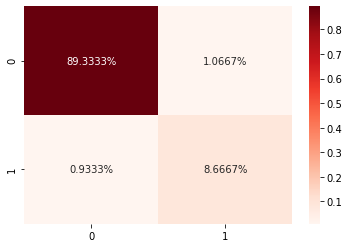

In [216]:
#confusion matrix for test set
conf = confusion_matrix(test_ploan,pred_ploan_test)
sns.heatmap(conf/np.sum(conf),fmt='.4%', annot=True,cmap="Reds")

#acceptable percent of false negatives

In [217]:
#other scores for model
avpr = metrics.average_precision_score(test_ploan,pred_ploan_test)
print("average precision score: {:.4f}".format(avpr),"\n")
f1 = metrics.f1_score(test_ploan,pred_ploan_test)
print("f1 score: {:.4f}".format(f1),"\n")
roc = metrics.roc_auc_score(test_ploan,pred_ploan_test)
print("roc auc score: {:.4f}".format(roc),"\n")
clrpt = metrics.classification_report(test_ploan,pred_ploan_test)
print("classification report: ",(clrpt),"\n")


average precision score: 0.8132 

f1 score: 0.8966 

roc auc score: 0.9455 

classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.89      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.94      0.95      0.94      1500
weighted avg       0.98      0.98      0.98      1500
 



decison tree is better than logistic regression with roc 0.94 and it also make way less false negatives.




**Random Forest**

In [218]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=8,random_state=0,n_estimators = 600)
rfc.fit(X=train_feat,y=train_ploan)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

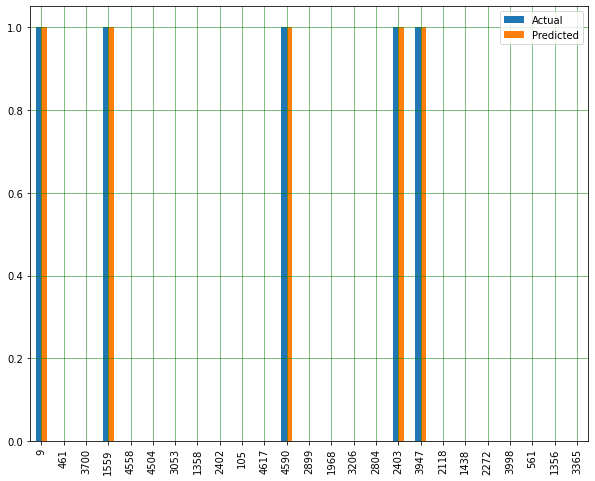

In [219]:
#making prediction
pred_ploan_test = rfc.predict(test_feat)
pred_ploan_train = rfc.predict(train_feat)

checker = pd.DataFrame({'Actual': test_ploan, 'Predicted': pred_ploan_test})
data = checker.head(25)
data.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Performance

In [220]:
# checking error values
print('Mean Absolute Error:', metrics.mean_absolute_error(test_ploan, pred_ploan_test))  
print('Mean Squared Error:', metrics.mean_squared_error(test_ploan, pred_ploan_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_ploan, pred_ploan_test)))

Mean Absolute Error: 0.012
Mean Squared Error: 0.012
Root Mean Squared Error: 0.10954451150103323


In [221]:
#accuracy
a = metrics.accuracy_score(train_ploan,pred_ploan_train)
b = metrics.accuracy_score(test_ploan,pred_ploan_test)
print("Accuracy of training set: {:.4f}".format(a))
print("Accuracy of test set: {:.4f}".format(b))

Accuracy of training set: 0.9951
Accuracy of test set: 0.9880


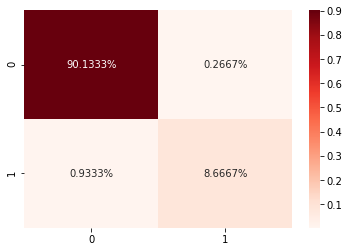

In [222]:
#confusion matrix for test set
conf = confusion_matrix(test_ploan,pred_ploan_test)
sns.heatmap(conf/np.sum(conf),fmt='.4%', annot=True,cmap="Reds")

#fewer false positives and false negatives than decision tree

In [224]:
#other scores for model
avpr = metrics.average_precision_score(test_ploan,pred_ploan_test)
print("average precision score: {:.4f}".format(avpr),"\n")
f1 = metrics.f1_score(test_ploan,pred_ploan_test)
print("f1 score: {:.4f}".format(f1),"\n")
roc = metrics.roc_auc_score(test_ploan,pred_ploan_test)
print("roc auc score: {:.4f}".format(roc),"\n")
clrpt = metrics.classification_report(test_ploan,pred_ploan_test)
print("classification report: ",(clrpt),"\n")

average precision score: 0.8852 

f1 score: 0.9353 

roc auc score: 0.9499 

classification report:                precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.97      0.90      0.94       144

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500
 



best model yet, has roc score of 0.95 and least percent of wrong classifications

**Neural Network**

for further reading: http://neuralnetworksanddeeplearning.com/

In [227]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes = (8,8,8),activation = 'relu',max_iter = 1000)
nn.fit(X=train_feat,y=train_ploan)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

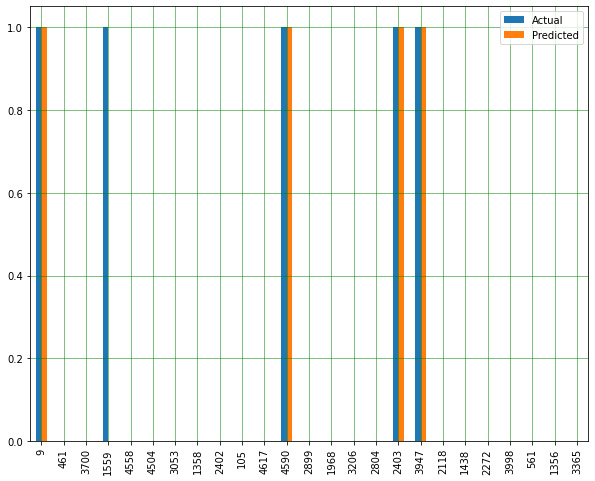

In [229]:
#making prediction
pred_ploan_test = nn.predict(test_feat)
pred_ploan_train = nn.predict(train_feat)

checker = pd.DataFrame({'Actual': test_ploan, 'Predicted': pred_ploan_test})
data = checker.head(25)
data.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Performance

In [230]:
# checking error values
print('Mean Absolute Error:', metrics.mean_absolute_error(test_ploan, pred_ploan_test))  
print('Mean Squared Error:', metrics.mean_squared_error(test_ploan, pred_ploan_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_ploan, pred_ploan_test)))

Mean Absolute Error: 0.019333333333333334
Mean Squared Error: 0.019333333333333334
Root Mean Squared Error: 0.1390443574307614


In [231]:
#accuracy
a = metrics.accuracy_score(train_ploan,pred_ploan_train)
b = metrics.accuracy_score(test_ploan,pred_ploan_test)
print("Accuracy of training set: {:.4f}".format(a))
print("Accuracy of test set: {:.4f}".format(b))

Accuracy of training set: 0.9894
Accuracy of test set: 0.9807


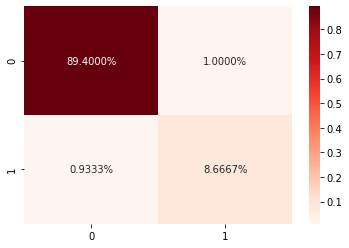

In [232]:
#confusion matrix for test set
conf = confusion_matrix(test_ploan,pred_ploan_test)
sns.heatmap(conf/np.sum(conf),fmt='.4%', annot=True,cmap="Reds")

#good but not better than Random forest


In [233]:
#other scores for model
avpr = metrics.average_precision_score(test_ploan,pred_ploan_test)
print("average precision score: {:.4f}".format(avpr),"\n")
f1 = metrics.f1_score(test_ploan,pred_ploan_test)
print("f1 score: {:.4f}".format(f1),"\n")
roc = metrics.roc_auc_score(test_ploan,pred_ploan_test)
print("roc auc score: {:.4f}".format(roc),"\n")
clrpt = metrics.classification_report(test_ploan,pred_ploan_test)
print("classification report: ",(clrpt),"\n")

average precision score: 0.8187 

f1 score: 0.8997 

roc auc score: 0.9459 

classification report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.94      0.95      0.94      1500
weighted avg       0.98      0.98      0.98      1500
 



This has high performance scores and is good at predicting but not as good as Random Forest

**KNN**

In [262]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 4)
knn.fit(X=train_feat,y=train_ploan)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

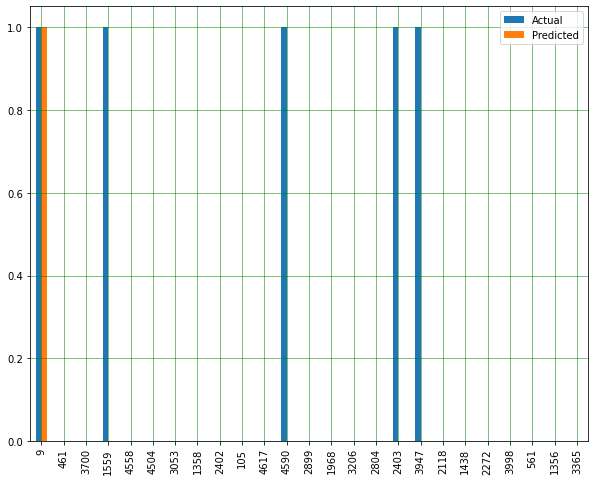

In [263]:
#making prediction
pred_ploan_test = knn.predict(test_feat)
pred_ploan_train = knn.predict(train_feat)

checker = pd.DataFrame({'Actual': test_ploan, 'Predicted': pred_ploan_test})
data = checker.head(25)
data.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Performance

In [265]:
# checking error values
print('Mean Absolute Error:', metrics.mean_absolute_error(test_ploan, pred_ploan_test))  
print('Mean Squared Error:', metrics.mean_squared_error(test_ploan, pred_ploan_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_ploan, pred_ploan_test)))

Mean Absolute Error: 0.035333333333333335
Mean Squared Error: 0.035333333333333335
Root Mean Squared Error: 0.1879716290649558


In [266]:
#accuracy
a = metrics.accuracy_score(train_ploan,pred_ploan_train)
b = metrics.accuracy_score(test_ploan,pred_ploan_test)
print("Accuracy of training set: {:.4f}".format(a))
print("Accuracy of test set: {:.4f}".format(b))

Accuracy of training set: 0.9697
Accuracy of test set: 0.9647


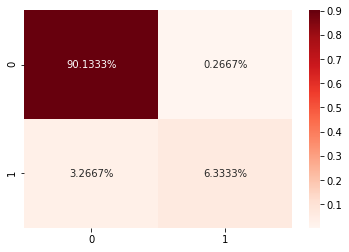

In [264]:
#confusion matrix for test set
conf = confusion_matrix(test_ploan,pred_ploan_test)
sns.heatmap(conf/np.sum(conf),fmt='.4%', annot=True,cmap="Reds")


In [267]:
#other scores for model
avpr = metrics.average_precision_score(test_ploan,pred_ploan_test)
print("average precision score: {:.4f}".format(avpr),"\n")
f1 = metrics.f1_score(test_ploan,pred_ploan_test)
print("f1 score: {:.4f}".format(f1),"\n")
roc = metrics.roc_auc_score(test_ploan,pred_ploan_test)
print("roc auc score: {:.4f}".format(roc),"\n")
clrpt = metrics.classification_report(test_ploan,pred_ploan_test)
print("classification report: ",(clrpt),"\n")

average precision score: 0.6657 

f1 score: 0.7819 

roc auc score: 0.8284 

classification report:                precision    recall  f1-score   support

           0       0.97      1.00      0.98      1356
           1       0.96      0.66      0.78       144

    accuracy                           0.96      1500
   macro avg       0.96      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500
 



this model makes a lot of false negatives.

**Out of the 5 models built, the best performing model with the highest score is Random forest model. It makes the least number of wrong classifications, both low in false postives and, more importantly, false negatives.**

#9. Final analysis and business understanding



1.   From the correlation matrix, it seems that personal loan column has the    most correlation with Income, CCavg and CD Account columns. So people with higher income, higher CCAvg and a CD account are more likely to take a personal loan. 
2.   As education level increases, the seperation betwwen the number of people taking loans increases with income.
3.   data does not include larger families with higher number of family members
4.   Most crucial value is the False negative value in the confusion matrix. It has to be as low as possible because the bank loses valuable clients with each false positive
5.   Out of the 5 models built, the best performing model with the highest score is Random forest model. It makes the least number of wrong classifications, both low in false postives and, more importantly, false negatives.
    
     average precision score: 0.8852 

     f1 score: 0.9353 

     roc auc score: 0.9499 

     
     False negatives: 0.9333%


     classification report:  precision    recall      f1-score        support

                              0       0.99      1.00      0.99      1356
                              1       0.97      0.90      0.94       144

     accuracy                           0.99      1500

     macro avg       0.98      0.95      0.96      1500

     weighted avg       0.99      0.99      0.99      1500

6.   If the bank collects much more data, the Neural network model will give more accurate predictions as it learns from the new data.
7.   With this predicting model, the bank can raduce its marketing costs.





